# Why are the cooling times so off?
cooling times should be 3.8kyrs ~ 1e11s

for shattered cells: \
ambient cooling time:\
cold cooling time: most cells (1128986/1181655) have positive values

n_h mostly within [1e-8, 1e-3] \
n_c ~20 times higher than n_h -> [1e-7, 1e-2]\
n about [1e-5, 1e-2]?




In [2]:
from grackle_script import cooling_func
from pygrackle.utilities.physical_constants import \
    mass_hydrogen_cgs, sec_per_Myr, cm_per_mpc, mass_sun_cgs, cm_per_kpc
# import gizmo_analysis as gizmo
import h5py
import numpy as np
import os

k_b = 1.380649e-16

In [3]:
fh = h5py.File('/ceph/submit/data/user/z/zimi/analysis/FIRE/m12f_res7100/output/snapshot_600.0.hdf5', 'r')
gas = fh["PartType0"]

In [4]:
halo_mask = np.load(f"/ceph/submit/data/user/z/zimi/grackle/grackle_data_files/input/halo_mask_0.npy")
shattered_mask = np.load(f"/ceph/submit/data/user/z/zimi/grackle/grackle_data_files/input/shattered_mask_0.npy")

In [5]:
rho = np.load(f"/ceph/submit/data/user/z/zimi/grackle/grackle_data_files/input/rho_c_0.npy")
zarr = gas['Metallicity']
# u_int = gas['InternalEnergy']

### try without UV heating

running grackle wih UV heating = 0 gives all negative values

In [20]:
rho

array([4.74683312e-29, 8.82869242e-26, 3.97093060e-26, ...,
       1.36239511e-29, 1.48830103e-29, 1.48733712e-26], shape=(195001,))

In [25]:
rate_cool, t_cool, chem = cooling_func(rho[0:100], zarr[0:100], redshift = 0, temperature = 10**4.3, chem_units=True, uvbackground = 0)
t_cool*31557600000000

array([-1.35175201e+17, -3.76241847e+12, -1.34515588e+13, -1.58899285e+17,
       -9.75744379e+16, -1.80274895e+17, -5.28082892e+17, -5.68591309e+17,
       -1.31710912e+17, -2.18839899e+14, -1.58500163e+16, -5.29674741e+13,
       -3.27590621e+16, -2.00205049e+17, -4.36944267e+17, -2.17671205e+17,
       -1.24160590e+14, -5.63861933e+13, -1.10786584e+14, -7.46411684e+16,
       -6.63122758e+17, -4.14204089e+13, -2.36498038e+17, -1.54423856e+17,
       -7.03659964e+17, -3.54719717e+17, -3.60033575e+17, -2.90097444e+17,
       -2.93619049e+13, -1.35387863e+17, -7.80478982e+17, -1.50591063e+16,
       -3.38342352e+16, -2.75437298e+17, -2.64026245e+17, -5.85331067e+15,
       -6.43389385e+16, -8.24345676e+17, -1.30633294e+17, -9.43498987e+17,
       -1.73687222e+17, -5.13362709e+17, -2.85669983e+16, -6.21498646e+17,
       -1.51169847e+17, -2.41706505e+17, -6.12717233e+17, -6.24763244e+17,
       -8.87787531e+16, -1.69639383e+13, -2.28625783e+14, -5.93591976e+16,
       -1.08235788e+17, -

In [26]:
rate_cool*5.070793734097626e-16

array([-1.07857357e-24, -2.08347014e-23, -1.29564450e-23, -1.08264303e-24,
       -1.02194860e-24, -1.05262267e-24, -8.56118910e-25, -9.52328317e-25,
       -1.75392743e-24, -3.46636991e-24, -8.51755840e-25, -6.52352012e-24,
       -1.03932030e-24, -6.42262152e-25, -1.04240305e-24, -9.30568420e-25,
       -4.46912827e-24, -6.40175952e-24, -4.28879347e-24, -1.02161235e-24,
       -1.05787270e-24, -7.03660447e-24, -8.30719640e-25, -1.42706438e-24,
       -6.43094941e-25, -6.56202341e-25, -6.47377063e-25, -6.48393358e-25,
       -8.53514800e-24, -1.03010020e-24, -8.94488668e-25, -1.24551555e-24,
       -1.14419383e-24, -1.09358747e-24, -1.11907265e-24, -1.33960752e-24,
       -1.06312827e-24, -8.18090486e-25, -1.43936425e-24, -6.45574440e-25,
       -1.05135048e-24, -9.60288887e-25, -1.17771987e-24, -9.68318484e-25,
       -1.04940770e-24, -9.82167080e-25, -9.77912732e-25, -9.29885844e-25,
       -1.08155704e-24, -1.13257352e-23, -3.47858277e-24, -9.17443096e-25,
       -1.06221890e-24, -

In [27]:
# calculate using formula:
tcool = (3/2)*k_b*(10**4.3)/(1*rate_cool*5.070793734097626e-16)
tcool

array([-3.83111127e+12, -1.98329475e+11, -3.18925090e+11, -3.81671084e+12,
       -4.04338864e+12, -3.92556185e+12, -4.82659048e+12, -4.33898195e+12,
       -2.35593293e+12, -1.19206417e+12, -4.85131441e+12, -6.33421113e+11,
       -3.97580551e+12, -6.43372082e+12, -3.96404768e+12, -4.44044230e+12,
       -9.24595386e+11, -6.45468698e+11, -9.63472691e+11, -4.04471949e+12,
       -3.90607997e+12, -5.87234283e+11, -4.97416358e+12, -2.89554938e+12,
       -6.42538934e+12, -6.29704455e+12, -6.38288815e+12, -6.37288357e+12,
       -4.84131661e+11, -4.01139167e+12, -4.61955028e+12, -3.31761043e+12,
       -3.61139455e+12, -3.77851383e+12, -3.69246391e+12, -3.08458659e+12,
       -3.88677031e+12, -5.05095151e+12, -2.87080590e+12, -6.40071094e+12,
       -3.93031196e+12, -4.30301281e+12, -3.50858935e+12, -4.26733089e+12,
       -3.93758822e+12, -4.20716135e+12, -4.22546434e+12, -4.44370178e+12,
       -3.82054319e+12, -3.64844781e+11, -1.18787899e+12, -4.50396913e+12,
       -3.89009778e+12, -

Best way to decrease cooling time to 1e11 is to have higher density/number density

### with UV heating:

In [8]:
rate_cool, t_cool, chem = cooling_func(rho[0:100], zarr[0:100], redshift = 0, temperature = 10**4.3, chem_units=True, uvbackground = 1)
t_cool*31557600000000

array([ 3.69326334e+16, -3.87343524e+12, -1.44507542e+13,  4.29328714e+16,
        2.58336190e+16,  4.66786213e+16,  1.02041673e+17,  1.21944536e+17,
        6.21324257e+16, -3.83289687e+14,  5.35341277e+15, -6.47605849e+13,
        1.07476085e+16,  3.03693501e+16,  1.04342768e+17,  4.85767549e+16,
       -1.78479133e+14, -6.94273377e+13, -1.59190448e+14,  2.06264482e+16,
        1.56093539e+17, -4.93501711e+13,  4.65052887e+16,  5.66297663e+16,
        1.00382633e+17,  5.30651637e+16,  5.30666611e+16,  4.34164231e+16,
       -3.35158191e+13,  3.51521033e+16,  1.54558831e+17,  7.70694521e+15,
        1.22958805e+16,  7.11816304e+16,  7.01241735e+16,  4.96466462e+15,
        1.90662662e+16,  1.49155366e+17,  4.94424083e+16,  1.34171145e+17,
        4.50731235e+16,  1.11678811e+17,  1.10953473e+16,  1.34806469e+17,
        3.96614777e+16,  5.65649548e+16,  1.34321182e+17,  1.30138264e+17,
        2.52742401e+16, -1.84982861e+13, -4.03361186e+14,  1.52711325e+16,
        2.96652076e+16,  

In [29]:
cool = h5py.File('/ceph/submit/data/user/z/zimi/analysis/FIRE/m12f_res7100/cooling_output/cooling_600_cold.0.hdf5')
cool[f'Cold/rate'].attrs['to_cgs']

np.float64(5.070793734097626e-16)

In [31]:
rate_cool*5.070793734097626e-16

array([ 3.94763077e-24, -2.02375567e-23, -1.20605733e-23,  4.00698107e-24,
        3.85993386e-24,  4.06527517e-24,  4.43055994e-24,  4.44042529e-24,
        3.71804866e-24, -1.97912980e-24,  2.52182011e-24, -5.33556612e-24,
        3.16788226e-24,  4.23400979e-24,  4.36515195e-24,  4.16985345e-24,
       -3.10898868e-24, -5.19926100e-24, -2.98473169e-24,  3.69692051e-24,
        4.49409674e-24, -5.90593767e-24,  4.22454243e-24,  3.89146553e-24,
        4.50795271e-24,  4.38645418e-24,  4.39216400e-24,  4.33239873e-24,
       -7.47731105e-24,  3.96741737e-24,  4.51691825e-24,  2.43369461e-24,
        3.14844662e-24,  4.23163640e-24,  4.21344788e-24,  1.57938946e-24,
        3.58751647e-24,  4.52138848e-24,  3.80298817e-24,  4.53971552e-24,
        4.05133107e-24,  4.41423490e-24,  3.03225491e-24,  4.46424145e-24,
        3.99982074e-24,  4.19687726e-24,  4.46083017e-24,  4.46416356e-24,
        3.79909683e-24, -1.03863176e-23, -1.97166643e-24,  3.56611967e-24,
        3.87558722e-24,  

In [38]:
tcool = (3/2)*k_b*(10**4.3)/(1e-4*rate_cool*5.070793734097626e-16)
tcool

array([ 1.04673806e+16, -2.04181535e+15, -3.42615171e+15,  1.03123407e+16,
        1.07051974e+16,  1.01644666e+16,  9.32644052e+15,  9.30571985e+15,
        1.11137205e+16, -2.08785466e+16,  1.63855279e+16, -7.74451161e+15,
        1.30438414e+16,  9.75939024e+15,  9.46618910e+15,  9.90954581e+15,
       -1.32909309e+16, -7.94754366e+15, -1.38442440e+16,  1.11772362e+16,
        9.19458485e+15, -6.99657804e+15,  9.78126140e+15,  1.06184556e+16,
        9.16632371e+15,  9.42021781e+15,  9.40797151e+15,  9.53775412e+15,
       -5.52623176e+15,  1.04151769e+16,  9.14812966e+15,  1.69788574e+16,
        1.31243622e+16,  9.76486396e+15,  9.80701673e+15,  2.61628654e+16,
        1.15180945e+16,  9.13908504e+15,  1.08654963e+16,  9.10219013e+15,
        1.01994513e+16,  9.36093224e+15,  1.36272691e+16,  9.25607502e+15,
        1.03308014e+16,  9.84573798e+15,  9.26315331e+15,  9.25623653e+15,
        1.08766256e+16, -3.97844121e+15, -2.09575784e+16,  1.15872034e+16,
        1.06619595e+16,  

## ambient

In [9]:
h = fh['Header'].attrs["HubbleParam"]
z = fh['Header'].attrs['Redshift']
a = 1 / (1 + z)

density_unit = 1e10 * h**2 / a**3 * mass_sun_cgs /  cm_per_kpc**3
rho = gas['Density'][:] * density_unit

u_int = gas['InternalEnergy'][:] * 1e10

In [16]:
rate_cool, t_cool, chem = cooling_func(rho[0:100], zarr[0:100], redshift = 0, u_int = u_int[0:100], chem_units=True, uvbackground = 1)

## check grackle units

/tmp/ipykernel_3070670/3166205834.py:95: VisibleDeprecationWarning: The energy field is deprecated and will be removed in Pygrackle 1.1. Use internal_energy instead.
  cooling_rate = fc.chemistry_data.cooling_units * fc["energy"] / \


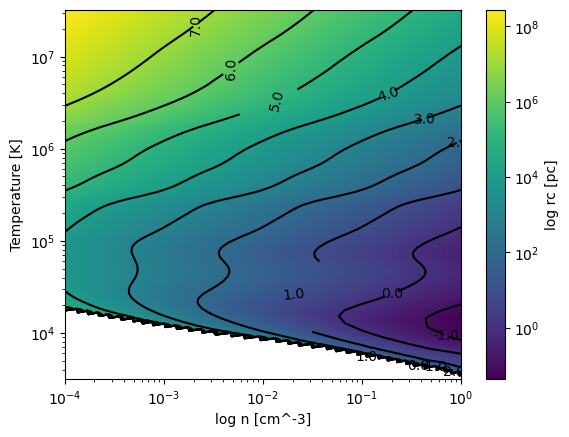

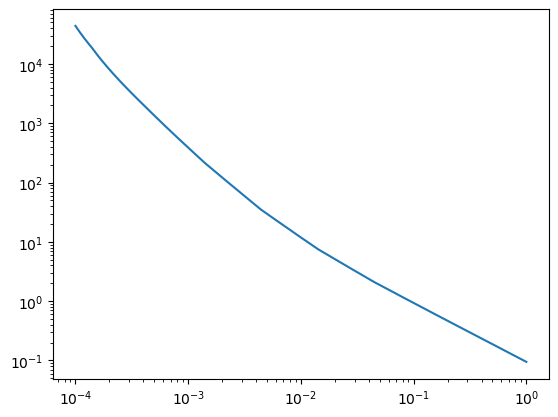

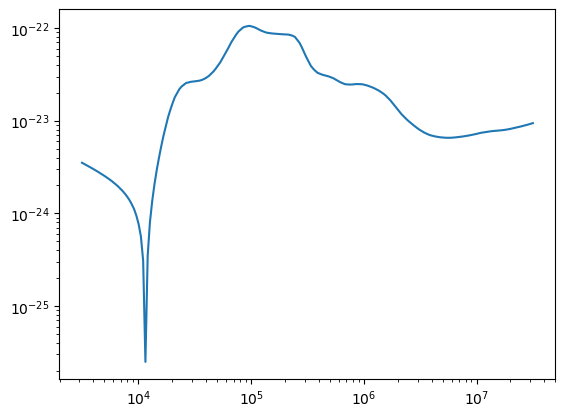

In [ ]:
import numpy as np

from pygrackle import chemistry_data
from pygrackle.fluid_container import FluidContainer

from pygrackle.utilities.physical_constants import \
    mass_hydrogen_cgs, sec_per_Myr, sec_per_Gyr, cm_per_mpc, mass_sun_cgs, cm_per_kpc

# Cooling rates at logT = 4.3 instead of virial temp, using grackle

# Test -- recreating Liang & Remming 2020 fig 2

num_rho = 300
num_T = 200
num_points = num_rho * num_T

solar_abund = np.array(
[
    7.0649785e-01, 2.8055534e-01, 2.0665436e-03, 8.3562563e-04,
    5.4926244e-03, 1.4144605e-03, 5.9070642e-04, 6.8258739e-04,
    4.0898522e-04, 6.4355001e-05, 1.1032152e-03
])


elements = [
     'H', 'He', 'C', 'N', 'O',
     'Ne', 'Mg', 'Si', 'S', 'Ca', 'Fe']
element_names = [
     "Hydrogen", "Helium", "Carbon", "Nitrogen", "Oxygen",
     "Neon", "Magnesium", "Silicon", "Sulphur", "Calcium", "Iron"]


Zarr = solar_abund * 0.3

#rho = np.logspace(-34, -30, num_rho)     # cgs units 

rho = np.logspace(-4, 0, num_rho) * mass_hydrogen_cgs
temperature = np.logspace(3.5, 7.5, num_T)
#temperature = [10**4.3, 10**4.7, 10**5, 10**6]
redshift = 0.0

chem = chemistry_data()
chem.use_grackle = 1
chem.with_radiative_cooling = 0     # Default example has this as 0
chem.metal_cooling = 1
chem.UVbackground = 1               # Add heating from UV background (only used if primordial_chemistry != 0)
chem.primordial_chemistry = 0       # Tabulated cooling (no chemistry). Assumes ionization equilibrium.
chem.H2_self_shielding = 0 
chem.self_shielding_method = 0      # Paper says self-shielding is sketchy when UV background is low or density is high.
                                    # Self-shielding is not applied to metal cooling. You'd need a separate CLOUDY table with it applied
chem.dust_chemistry = 0 

chem.grackle_data_file = bytearray(
    "/ceph/submit/data/user/z/zimi/grackle/grackle_data_files/input/CloudyData_UVB=HM2012.h5",
    #"/home/alanman/Desktop/repositories/grackle/grackle_data_files/input/CloudyData_UVB=HM2012.h5",
    #"/home/alanman/Desktop/repositories/grackle/grackle_data_files/input/CloudyData_noUVB.h5",
    #"/home/alanman/Desktop/repositories/grackle/grackle_data_files/input/CloudyData_UVB=FG2011_shielded.h5",
    'utf-8')
chem.use_specific_heating_rate = 1
chem.use_volumetric_heating_rate = 1

# Set units (used to scale internal values to be near 1)
chem.comoving_coordinates = 0 # proper units
chem.a_units = 1.0
chem.a_value = 1.0 / (1.0 + redshift) / \
    chem.a_units
chem.density_units = mass_hydrogen_cgs # rho = 1.0 is 1.67e-24 g/cm3
chem.length_units = cm_per_mpc         # 1 Mpc in cm
chem.time_units = sec_per_Myr          # 1 Myr in s
chem.set_velocity_units()

chem.initialize()
fc = FluidContainer(chem, num_points)

rho_g, T_g = map(np.ndarray.flatten, np.meshgrid(rho, temperature, indexing='ij'))
fc['density'][:] = rho_g / chem.density_units
#fc['energy'][:] = u_int / chem.velocity_units**2       # Specific energy has velocity^2 units
fc['metal_density'][:] = rho_g / chem.density_units * np.sum(Zarr[2:], axis=-1)

fc.calculate_mean_molecular_weight()

fc['mean_molecular_weight'][:] = 0.6

fc["internal_energy"] = T_g / \
    fc.chemistry_data.temperature_units / \
    fc["mean_molecular_weight"] / (chem.Gamma - 1.0)
fc.calculate_mean_molecular_weight()


fc.calculate_cooling_time()

density_proper = fc["density"] / \
        (chem.a_units *
         chem.a_value)**(3*chem.comoving_coordinates)
cooling_rate = fc.chemistry_data.cooling_units * fc["energy"] / \
        fc["cooling_time"] / density_proper

## cooling_time_g = cooling_rate


## import pylab as pl
## import IPython; IPython.embed()
## 
## import sys; sys.exit()

cooling_time_g = fc['cooling_time'] * chem.time_units
#ct = cooling_time_g.reshape((num_rho, num_T))

cs_g = np.sqrt(chem.Gamma * (chem.Gamma - 1) * fc['internal_energy'] * chem.energy_units)

rc_pc = -(cs_g * cooling_time_g / cm_per_kpc * 1000).reshape((num_rho, num_T))

from matplotlib import pyplot as plt

mu = fc["mean_molecular_weight"]
#print(mu)
num_dens = rho/(mass_hydrogen_cgs)

plt.pcolormesh(num_dens, temperature, rc_pc.T, norm='log')
plt.colorbar(label='log rc [pc]')
plt.xlabel("log n [cm^-3]")
plt.ylabel("Temperature [K]")
levels = 10.0**np.arange(-4, 5)  * 1000
cs = plt.contour(num_dens, temperature, rc_pc.T, levels=levels, norm='log', colors='k')
plt.clabel(cs, fmt=lambda x: f"{np.log10(x):.1f}", inline_spacing=1)

## for ii in range(num_T):
##     vals = rc_pc[:, ii]
##     neg = vals < 0
##     p = pl.plot(rho[neg], np.abs(vals[neg]), ls='--')
##     pl.plot(rho[~neg], vals[~neg], label=f"{np.log10(temperature[ii])}", color=p[-1].get_color())
## pl.legend()
plt.xscale('log'); plt.yscale('log')
plt.show()


# Plot the rc vs number density logT = 4.3
Tind = np.argmin(np.abs(np.log10(temperature) - 4.3))
rc_slc = rc_pc[:, Tind]
plt.plot(num_dens, rc_slc)
plt.xscale("log"); plt.yscale('log')
plt.show()

rhoind = np.argmin(np.abs(0.75*rho - mass_hydrogen_cgs*1e-3))
np.abs(cooling_rate.reshape((num_rho, num_T)))
plt.plot(temperature, np.abs(cooling_rate.reshape((num_rho, num_T)))[rhoind])
plt.xscale("log"); plt.yscale('log')
plt.show()

# import IPython; IPython.embed()


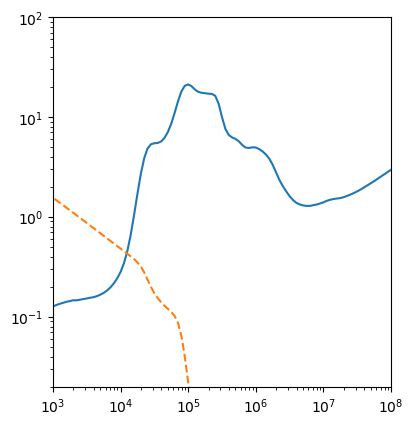

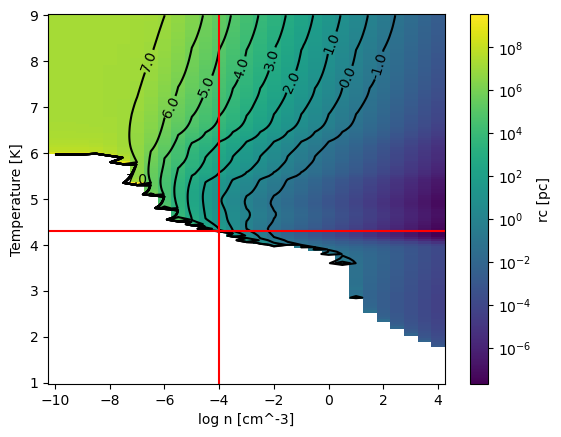

In [3]:
import numpy as np
from astropy import coordinates as ac, units as un, constants as con
import pylab as pl
import h5py
import matplotlib.pyplot as plt


fh = h5py.File("/ceph/submit/data/user/z/zimi/grackle/grackle_data_files/input/CloudyData_UVB=HM2012.h5", 'r')

make_fig1 = True

# Axes = (log_nH, redshift, temperature)

cool = fh['CoolingRates/Primordial/Cooling'][()]
heat = fh['CoolingRates/Primordial/Heating'][()]
metal_cool = fh['CoolingRates/Metals/Cooling'][()]
metal_heat = fh['CoolingRates/Metals/Heating'][()]

zzz = fh['CoolingRates/Primordial/Cooling'].attrs['Parameter2']
logT = np.log10(fh['CoolingRates/Primordial/Cooling'].attrs['Temperature'])
log_nH = fh['CoolingRates/Primordial/Cooling'].attrs['Parameter1']

log_nH_g, logT_g = map(np.ndarray.flatten, np.meshgrid(log_nH, logT, indexing='ij'))


# From the grackle source code, it seems that one should combine the metal and primordial tables by scaling the metal
# rates by the metallicity relative to solar.
cool_tot_03Z = (cool + metal_cool * 0.3) * un.erg /un.s * un.cm**3
heat_tot_03Z = (heat + metal_heat * 0.3) * un.erg /un.s * un.cm**3
net_cool = cool_tot_03Z - heat_tot_03Z      # positive = net cooling

if make_fig1:
    # Make Fig 1 of Liang & Remming, showing cooling and heating rates of 0.3 Z_\sun gas a log_nH = -3
    nh_ind = np.argmin(np.abs(log_nH - -3))
    
    fig = pl.figure(figsize=pl.figaspect(1.1))
    pl.plot(10**logT, cool_tot_03Z[nh_ind, 0, :].to_value("1e-23 erg cm^3 s^-1"), color='tab:blue', ls='-')
    pl.plot(10**logT, heat_tot_03Z[nh_ind, 0, :].to_value("1e-23 erg cm^3 s^-1"), color='tab:orange', ls='--')
    pl.xlim([1e3, 1e8])
    pl.ylim([2e-2, 1e2])
    pl.xscale('log'); pl.yscale('log')
    pl.show()


Gamma = 5/3
num_rho = 29
num_T = 161
num_points = num_rho * num_T
# Now get cooling timescales
# Axes = (log_nH, temperature)
cooling_time_g = (3/2) * con.k_B * 10**logT_g * un.K / ((10**log_nH_g)/0.75/ un.cm**3 * net_cool[:,0].flatten())
cs_g = np.sqrt(Gamma * logT_g* un.K*con.k_B/(0.6*con.m_p))

rc = (cs_g * cooling_time_g).reshape((num_rho, num_T))
rc_pc = rc.to(un.pc)

plt.pcolormesh(log_nH, logT, (rc_pc.T).value, norm = 'log')
plt.colorbar(label='rc [pc]')
plt.xlabel("log n [cm^-3]")
plt.ylabel("Temperature [K]")


levels = 10.0**np.arange(-4, 5)  * 1000
cs = plt.contour(log_nH, logT, (rc_pc.T).value, levels=levels, norm='log', colors='k')
plt.clabel(cs, fmt=lambda x: f"{np.log10(x):.1f}", inline_spacing=1)

plt.axhline(y=4.3, c=  'r')
plt.axvline(x=-4, c=  'r')



/tmp/ipykernel_1505929/2957486218.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


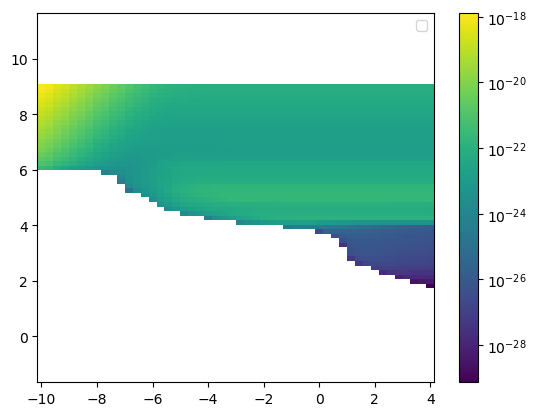

In [ ]:
from scipy.interpolate import LinearNDInterpolator
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(min(log_nH), max(log_nH))
Y = np.linspace(min(logT), max(logT))
interp = LinearNDInterpolator(list(zip(log_nH, logT)), net_cool[:,0].flatten())
X, Y = np.meshgrid(X, Y)
Z = interp(X, Y)

plt.pcolormesh(X, Y, Z, shading='auto', norm = 'log')
plt.legend()
plt.colorbar()
plt.axis("equal")
plt.show()

In [51]:
list(zip(log_nH, logT))

[(np.float64(-10.0), np.float64(1.0)),
 (np.float64(-9.5), np.float64(1.0499998241554094)),
 (np.float64(-9.0), np.float64(1.0999998579423673)),
 (np.float64(-8.5), np.float64(1.1500001400088755)),
 (np.float64(-8.0), np.float64(1.1999999472615537)),
 (np.float64(-7.5), np.float64(1.2499998998595714)),
 (np.float64(-7.0), np.float64(1.2999999314429707)),
 (np.float64(-6.5), np.float64(1.3499999731188195)),
 (np.float64(-6.0), np.float64(1.3999999253938222)),
 (np.float64(-5.5), np.float64(1.4500000105917006)),
 (np.float64(-5.0), np.float64(1.500000046671104)),
 (np.float64(-4.5), np.float64(1.5500000131781912)),
 (np.float64(-4.0), np.float64(1.600000032123142)),
 (np.float64(-3.5), np.float64(1.6500000076313377)),
 (np.float64(-3.0), np.float64(1.6999999708609113)),
 (np.float64(-2.5), np.float64(1.7499999805455702)),
 (np.float64(-2.0), np.float64(1.7999999693838207)),
 (np.float64(-1.5), np.float64(1.8500000095796638)),
 (np.float64(-1.0), np.float64(1.8999999810146946)),
 (np.floa